In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tifffile as tf
import math
import matplotlib as mpl
from skimage import io

In [2]:
file_folder_list_ach_1 = ['20230417-nsyb-G7f-rAch1h/fly2',
                        '20230420-nsyb-G7f-rAch1h/fly2',
                        '20230420-nsyb-G7f-rAch1h/fly3',
                        '20230428-nsyb-G7f-rAch1h/fly1',
                        '20230507-nsyb-G7f-rAch1h/fly1',
                        '20230510-nsyb-G7f-rAch1h/fly1',
                        '20230510-nsyb-G7f-rAch1h/fly2',
                        '20230511-nsyb-G7f-rAch1h/fly2',
                        '20230511-nsyb-G7f-rAch1h/fly3',
                        '20230515-nsyb-G7f-rAch1h/fly1']
file_folder_list_5ht_1 = ['20230429-nsyb-G7f-r5HT1.0/fly1',
                        '20230506-nsyb-G7f-r5HT1.0/fly1',
                        '20230513-nsyb-G7f-r5HT1.0/fly1',
                        '20230513-nsyb-G7f-r5HT1.0/fly2',
                        '20230516-nsyb-G7f-r5HT1.0/fly2',
                        '20230516-nsyb-G7f-r5HT1.0/fly4',
                        '20230517-nsyb-G7f-r5HT1.0/fly1',
                        '20230601-nsyb-G7f-r5HT1.0/fly1',
                        '20230601-nsyb-G7f-r5HT1.0/fly3',
                        '20230603-nsyb-G7f-r5HT1.0/fly1']
# only left part
br_index = np.array([64,65,66,55,72,73,74,
            63,84,59,
            4,23,26,
            79])
br_name = np.array(['MBPED','MBVL','MBML','LH','SLP','SIP','SMP',
           'CRE','SCL','ICL',
            'NO','EB','FB',
            'AOTU'])
br_olf = np.array([1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
print(len(br_index))
print(len(br_name))
print(len(br_olf))
atlas_path = '../data'
atlas_file_name = 'align_to_atlas/Transformed_atlas_eroded_r5.tif'
atlas_z_range = range(13,38)
color_list = ['#006934','#751C77','#036EB8']

ach_none = [4]
ht_none = [55,59]

14
14
23


In [3]:
result_path_1 = 'Z:/0-FJQ/results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/tif_new'
result_path_2 = 'Z:/0-FJQ/results/nsyb-G7f-r5HT1.0-ensemble_weight/summary_2/tif_new'
result_save_path = './results/ensemble_weight'
folder = os.path.exists(result_save_path)
if not folder:
    os.makedirs(result_save_path)

In [4]:
# path_1
channel_list = [1,2]
odor_list = [0,1,2]
fly_list = [0,1,2,3,4,5,6,7,8,9]
LH_none = [4]

num_fly = len(fly_list)
num_channel = len(channel_list)
num_odor = len(odor_list)
data_1 = np.zeros((num_fly,num_channel,num_odor,25,256,256))
for i in range(num_fly):
    for j in range(num_channel):
        for k in range(num_odor):
            data = io.imread(result_path_1+'/'+'fly_'+str(fly_list[i])+'_channel_'+str(channel_list[j])+'_odor_'+str(odor_list[k])+'.tif')
            data[data==0] = 10000
            data_1[i,j,k,:,:,:] = data/10000-1

# statistics
list_en = np.zeros((num_fly,len(br_index),num_channel,num_odor))
for i,id in enumerate(fly_list):

    # load atlas
    the_atlas_path = atlas_path + '/' + file_folder_list_ach_1[id] + '/' + atlas_file_name
    atlas= tf.imread(the_atlas_path)
    atlas = atlas[atlas_z_range,:,:]

    for j,index in enumerate(br_index):
        if j==3 and i in LH_none:
            continue
        mask = atlas == index
        if np.sum(mask)>0:
            flag = data_1[i,:,:,:]
            flag = flag[:,:,mask]
            if flag.ndim==3:
                data = np.nanmean(flag,2)
                list_en[i,j,:,:] = data

list_en_1 = list_en
print(np.shape(list_en_1))

(10, 14, 2, 3)


In [5]:
# path_2
channel_list = [1,2]
odor_list = [0,1,2]
fly_list = [0,1,2,3,4,5,6,7,8,9]
LH_none = [7]
GOR_none = [1,5,9]

num_fly = len(fly_list)
num_channel = len(channel_list)
num_odor = len(odor_list)
data_2 = np.zeros((num_fly,num_channel,num_odor,25,256,256))
for i in range(num_fly):
    for j in range(num_channel):
        for k in range(num_odor):
            data = io.imread(result_path_2+'/'+'fly_'+str(fly_list[i])+'_channel_'+str(channel_list[j])+'_odor_'+str(odor_list[k])+'.tif')
            data[data==0] = 10000
            data_2[i,j,k,:,:,:] = data/10000-1

# statistics
list_en = np.zeros((num_fly,len(br_index),num_channel,num_odor))
for i,id in enumerate(fly_list):

    # load atlas
    the_atlas_path = atlas_path + '/' + file_folder_list_5ht_1[id] + '/' + atlas_file_name
    atlas= tf.imread(the_atlas_path)
    atlas = atlas[atlas_z_range,:,:]

    for j,index in enumerate(br_index):
        if j==3 and i in LH_none:
            continue
        if j==19 and i in GOR_none:
            continue
        mask = atlas == index
        if np.sum(mask)>0:
            flag = data_2[i,:,:,:]
            flag = flag[:,:,mask]
            if flag.ndim==3:
                data = np.nanmean(flag,2)
                list_en[i,j,:,:] = data

list_en_2 = list_en
print(np.shape(list_en_2))

(10, 14, 2, 3)


In [6]:
list_en_g7f = np.concatenate((list_en_1[:,:,0,:],list_en_2[:,:,0,:]),axis = 0)
list_en_g7f = np.squeeze(list_en_g7f)
list_en_ach = np.squeeze(list_en_1[:,:,1,:])
list_en_5ht = np.squeeze(list_en_2[:,:,1,:])
list_en_ach[:,np.isin(br_index, ach_none),:] = np.nan 
list_en_5ht[:,np.isin(br_index, ht_none),:] = np.nan

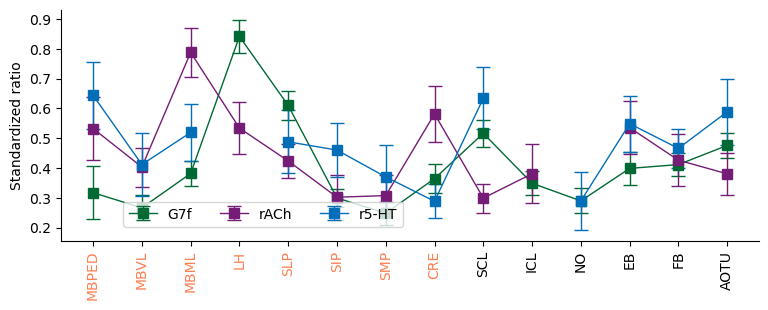

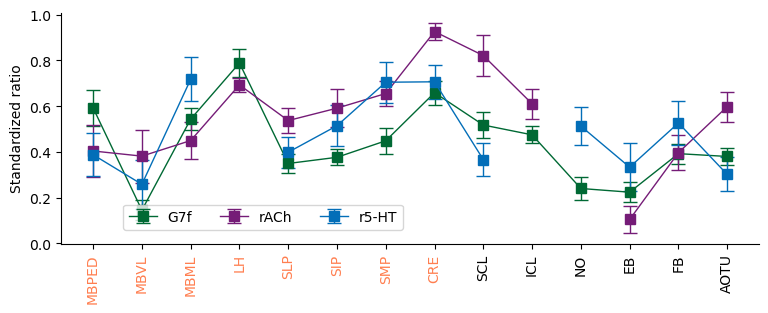

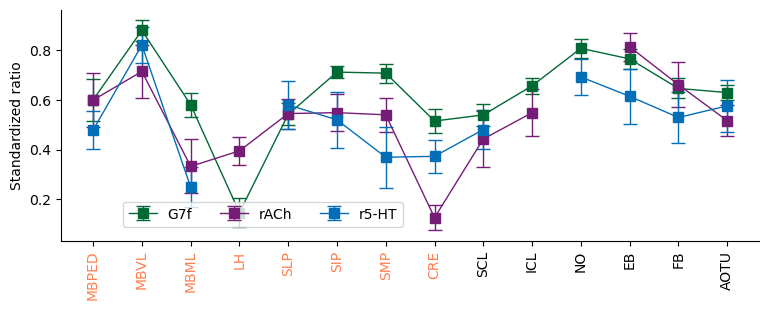

In [7]:
for i in range(len(odor_list)):
    plt.figure(figsize = (9,3))
    ax = plt.axes()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # g7f
    en_g7f = np.squeeze(list_en_g7f[:,:,i])
    min_vals = np.nanmin(en_g7f, axis=1, keepdims=True)
    max_vals = np.nanmax(en_g7f, axis=1, keepdims=True)
    en_g7f = (en_g7f - min_vals) / (max_vals - min_vals)
    the_mean = np.zeros(np.size(en_g7f,1))
    the_std = np.zeros(np.size(en_g7f,1))
    for j in range(np.size(en_g7f,1)):
        aa = np.squeeze(en_g7f[:,j])
        the_mean[j] = np.mean(aa)
        the_std[j] = np.std(aa,ddof = 1)/math.sqrt(len(aa)) 
    plt.errorbar(range(np.size(list_en_g7f,1)),the_mean,yerr=the_std,ecolor=color_list[0],elinewidth=1,marker='s',mfc=color_list[0],\
	mec=color_list[0],mew=1,ms=7,alpha=1,capsize=5,capthick=3,color=color_list[0], linewidth=1,label = 'G7f')     
    # ach
    en_ach = np.squeeze(list_en_ach[:,:,i])
    min_vals = np.nanmin(en_ach, axis=1, keepdims=True)
    max_vals = np.nanmax(en_ach, axis=1, keepdims=True)
    en_ach = (en_ach - min_vals) / (max_vals - min_vals)
    the_mean = np.zeros(np.size(en_ach,1))
    the_std = np.zeros(np.size(en_ach,1))
    for j in range(np.size(en_ach,1)):
        aa = np.squeeze(en_ach[:,j])
        the_mean[j] = np.mean(aa)
        the_std[j] = np.std(aa,ddof = 1)/math.sqrt(len(aa)) 
    plt.errorbar(range(np.size(list_en_g7f,1)),the_mean,yerr=the_std,ecolor=color_list[1],elinewidth=1,marker='s',mfc=color_list[1],\
	mec=color_list[1],mew=1,ms=7,alpha=1,capsize=5,capthick=3,color=color_list[1], linewidth=1,label = 'rACh')    
    # 5ht
    en_5ht = np.squeeze(list_en_5ht[:,:,i])
    min_vals = np.nanmin(en_5ht, axis=1, keepdims=True)
    max_vals = np.nanmax(en_5ht, axis=1, keepdims=True)
    en_5ht = (en_5ht - min_vals) / (max_vals - min_vals)
    the_mean = np.zeros(np.size(en_5ht,1))
    the_std = np.zeros(np.size(en_5ht,1))
    for j in range(np.size(en_5ht,1)):
        aa = np.squeeze(en_5ht[:,j])
        the_mean[j] = np.mean(aa)
        the_std[j] = np.std(aa,ddof = 1)/math.sqrt(len(aa)) 
    plt.errorbar(range(np.size(list_en_g7f,1)),the_mean,yerr=the_std,ecolor=color_list[2],elinewidth=1,marker='s',mfc=color_list[2],\
	mec=color_list[2],mew=1,ms=7,alpha=1,capsize=5,capthick=3,color=color_list[2], linewidth=1,label = 'r5-HT')  

    plt.xticks(range(len(br_index)),br_name,rotation=90)
    # plt.ylim((-0.1,1.1))
    plt.ylabel('Standardized ratio')
    plt.legend(bbox_to_anchor=(0.5, 0.03),loc=4,ncol=3)
    for j in range(len(br_index)):
        if br_olf[j]==1:
            plt.gca().get_xticklabels()[j].set_color('coral') 

    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    plt.savefig(result_save_path + '/' + 'ensemble_weight_map' + '_odor'+str(i)+'.pdf',dpi = 300,bbox_inches = 'tight')
    plt.savefig(result_save_path + '/' + 'ensemble_weight_map' + '_odor'+str(i)+'.png',dpi = 300,bbox_inches = 'tight')
    plt.show()  

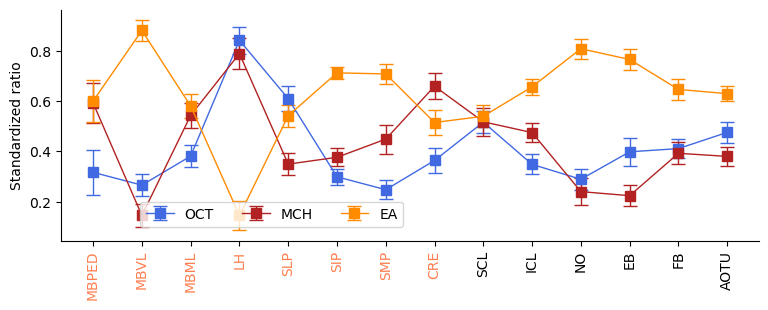

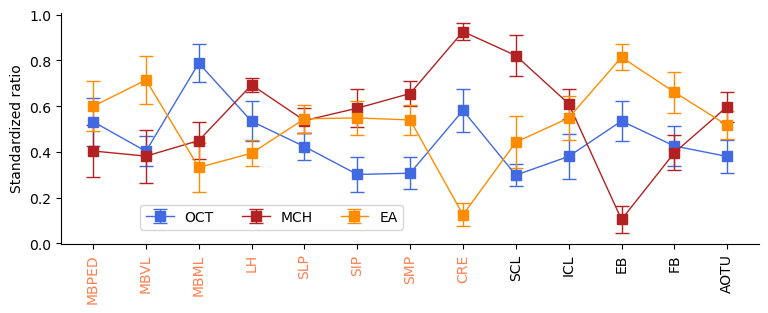

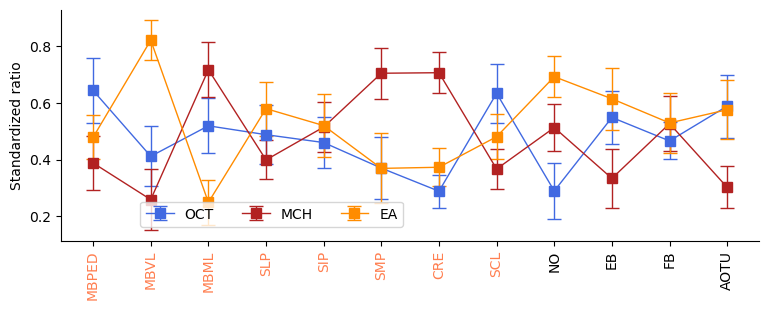

In [8]:
for kk in range(3):
    if kk==0:
        list_en_selected = list_en_g7f
    elif kk==1:
        list_en_selected = list_en_ach
    else:
        list_en_selected = list_en_5ht
    plt.figure(figsize = (9,3))
    ax = plt.axes()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    c_odor_list = ['royalblue','firebrick','darkorange']
    legend_odor_list = ['OCT','MCH','EA']
    for i in range(len(odor_list)):
        # g7f
        en_g7f = np.squeeze(list_en_selected[:,:,i])
        min_vals = np.nanmin(en_g7f, axis=1, keepdims=True)
        max_vals = np.nanmax(en_g7f, axis=1, keepdims=True)
        en_g7f = (en_g7f - min_vals) / (max_vals - min_vals)
        the_mean = np.zeros(np.size(en_g7f,1))
        the_std = np.zeros(np.size(en_g7f,1))
        for j in range(np.size(en_g7f,1)):
            aa = np.squeeze(en_g7f[:,j])
            the_mean[j] = np.mean(aa)
            the_std[j] = np.std(aa,ddof = 1)/math.sqrt(len(aa)) 
        if kk==0:
            plt.errorbar(range(np.size(list_en_g7f,1)),the_mean,yerr=the_std,ecolor=c_odor_list[i],elinewidth=1,marker='s',mfc=c_odor_list[i],\
            mec=c_odor_list[i],mew=1,ms=7,alpha=1,capsize=5,capthick=3,color=c_odor_list[i], linewidth=1,label = legend_odor_list[i])     
            plt.xticks(range(len(br_index)),br_name,rotation=90)
            for j in range(len(br_index)):
                if br_olf[j]==1:
                    plt.gca().get_xticklabels()[j].set_color('coral') 
        elif kk==1:
            plt.errorbar(range(np.size(list_en_g7f[:,~np.isin(br_index, ach_none)],1)),the_mean[~np.isin(br_index, ach_none)],yerr=the_std[~np.isin(br_index, ach_none)],\
                         ecolor=c_odor_list[i],elinewidth=1,marker='s',mfc=c_odor_list[i],\
                            mec=c_odor_list[i],mew=1,ms=7,alpha=1,capsize=5,capthick=3,color=c_odor_list[i], linewidth=1,label = legend_odor_list[i])     
            plt.xticks(range(len(br_index[~np.isin(br_index, ach_none)])),br_name[~np.isin(br_index, ach_none)],rotation=90)
            for j in range(len(br_index[~np.isin(br_index, ach_none)])):
                if br_olf[j]==1:
                    plt.gca().get_xticklabels()[j].set_color('coral') 
        else:
            plt.errorbar(range(np.size(list_en_g7f[:,~np.isin(br_index, ht_none)],1)),the_mean[~np.isin(br_index, ht_none)],yerr=the_std[~np.isin(br_index, ht_none)],\
                         ecolor=c_odor_list[i],elinewidth=1,marker='s',mfc=c_odor_list[i],\
                            mec=c_odor_list[i],mew=1,ms=7,alpha=1,capsize=5,capthick=3,color=c_odor_list[i], linewidth=1,label = legend_odor_list[i])     
            plt.xticks(range(len(br_index[~np.isin(br_index, ht_none)])),br_name[~np.isin(br_index, ht_none)],rotation=90)
            for j in range(len(br_index[~np.isin(br_index, ht_none)])):
                if br_olf[j]==1:
                    plt.gca().get_xticklabels()[j].set_color('coral') 

        plt.legend(bbox_to_anchor=(0.5, 0.03),loc=4,ncol=3)
    # plt.ylim((-0.1,1.1))
    plt.ylabel('Standardized ratio')
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    plt.savefig(result_save_path + '/' + 'ensemble_weight_map' + '_c'+str(kk)+'.pdf',dpi = 300,bbox_inches = 'tight')
    plt.savefig(result_save_path + '/' + 'ensemble_weight_map' + '_c'+str(kk)+'.png',dpi = 300,bbox_inches = 'tight')
    plt.show() 